

# *Higher Education Students Performance Analysis*
#### *Team Members*:
# `Mariam Attia 211000533`
# `Farah eldessouki 211001836`
# `Mai elgazzar 211001757`
# `Uomna hesham 211001623`
# `Nada atef 211001921`





# *1-Import Libraries*
# *2-Data Importing and Cleaning*
# *3-The dropout rate*
# *4-Explorartory Data Analysis (EDA)*
# *5-Exploring Academic Data*
# *6-Data Preprocessing*
# *7-Modelling*
        

# 1. Import Libraries

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

#*2-Data Importing and Cleaning*

In [2]:
dataset=pd.read_csv("dataset.csv")
dataset.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [3]:
dataset.shape

(4424, 35)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [5]:
dataset.duplicated().sum()

0

In [62]:
dataset.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [6]:
dataset.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [7]:
dataset = dataset.rename(columns={'Nacionality': 'Nationality'})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [8]:
dataset['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [9]:
dataset.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nationality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International               

# 3-The dropout rate



In [10]:
counts=dataset['Target'].value_counts()
counts

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

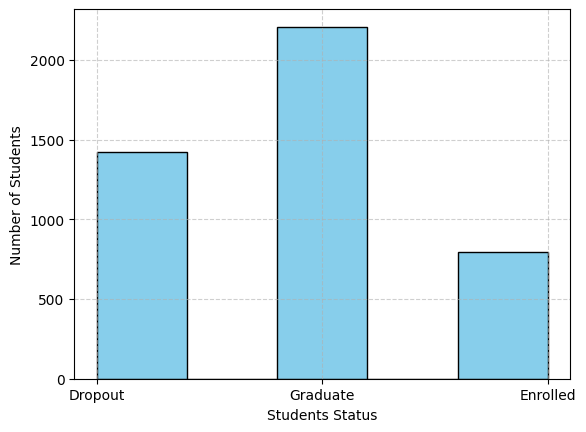

In [11]:
plt.hist(dataset['Target'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Students Status')
plt.ylabel('Number of Students')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



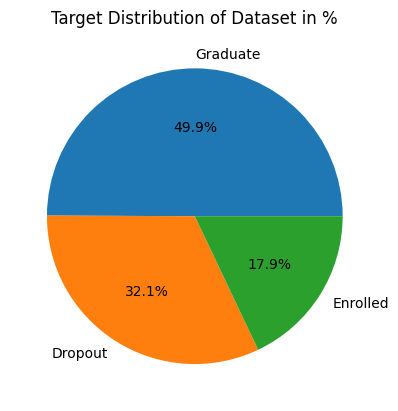

In [12]:
students_target = dataset['Target'].value_counts()
plt.pie(students_target, labels=students_target.index, autopct='%2.1f%%')
plt.title('Target Distribution of Dataset in %')
plt.show()



# 4- Explorartory Data Analysis (EDA)

# *Gender and Target*

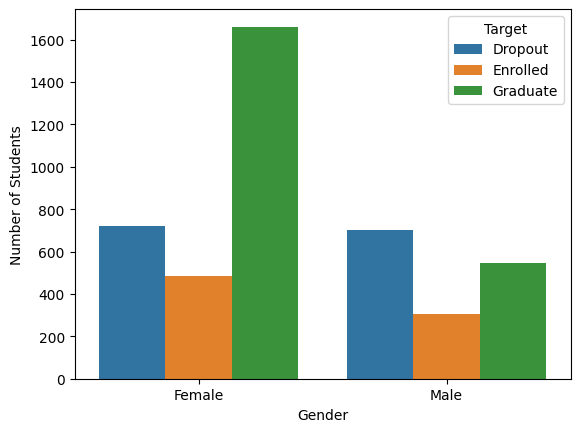

In [13]:
sns.countplot(data=dataset, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[1,0], labels=['Male', 'Female'])
plt.ylabel('Number of Students')
plt.show()


# *Age at enrollment and Target*

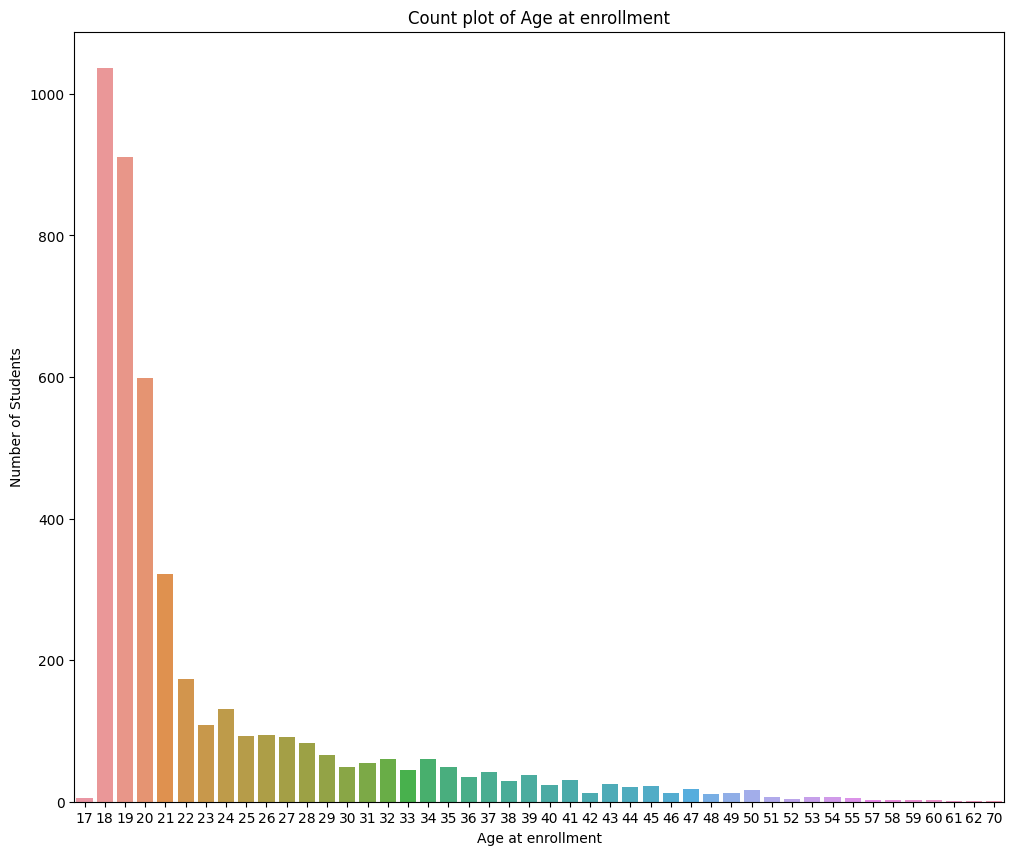

In [14]:
plt.figure(figsize=(12, 10))
sns.countplot(data=dataset, x="Age at enrollment")
plt.xlabel('Age at enrollment')
plt.ylabel('Number of Students')
plt.title('Count plot of Age at enrollment')
plt.show()


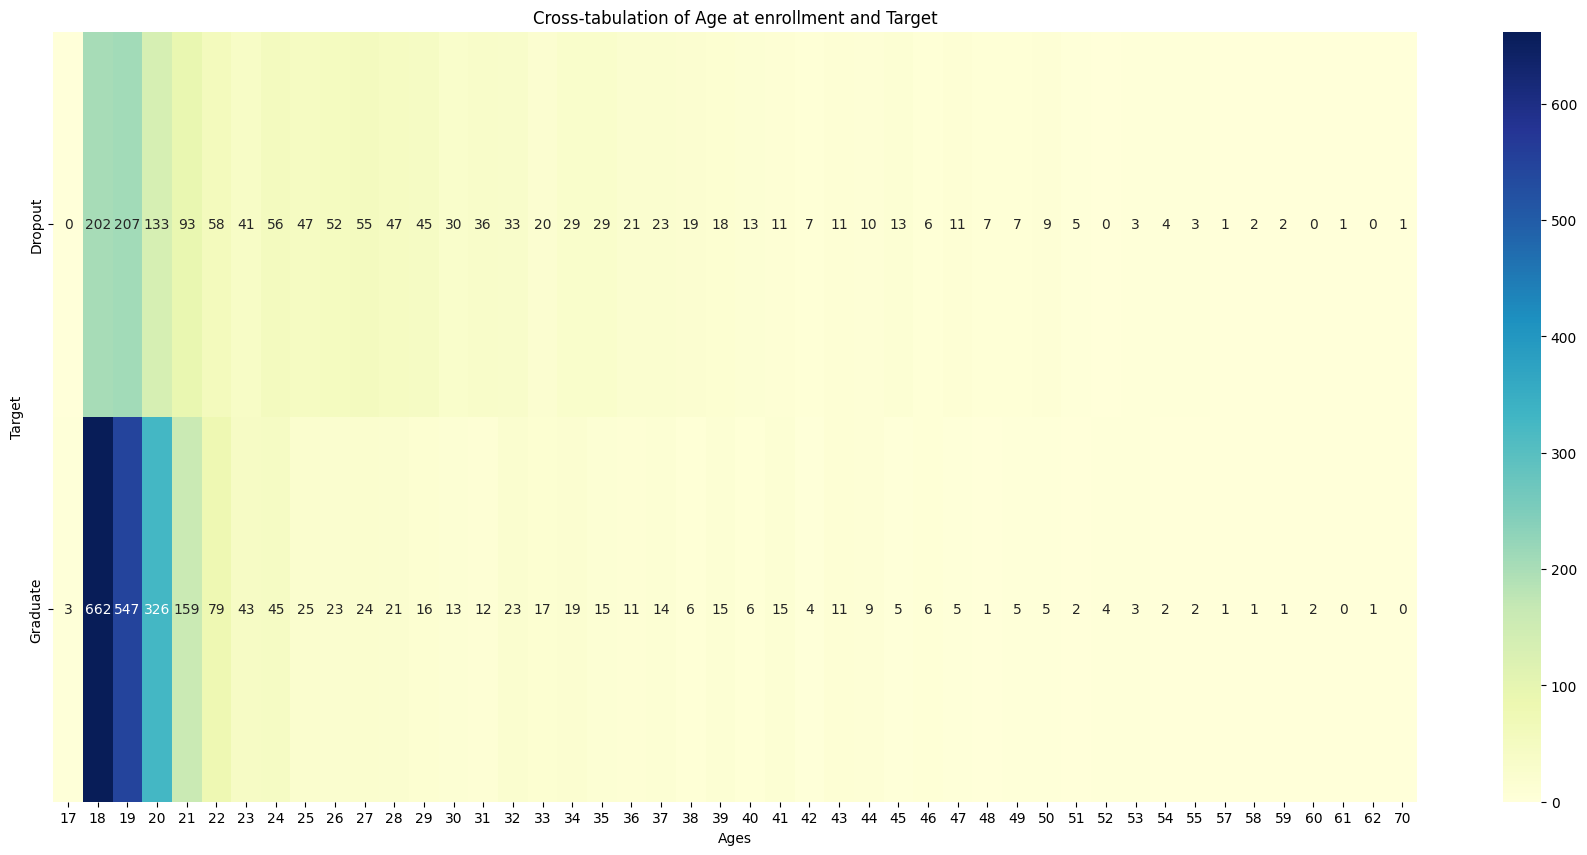

In [58]:
cross_tab = pd.crosstab(dataset['Target'], dataset['Age at enrollment'])
plt.figure(figsize=(22, 10))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Ages')
plt.ylabel('Target')
plt.title('Cross-tabulation of Age at enrollment and Target')
plt.show()


<ipython-input-16-d4882e5e48d7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p1 = sns.kdeplot(dataset[dataset['Target'] == 'Graduate']['Age at enrollment'], shade=True, color='b', label='Graduate')
<ipython-input-16-d4882e5e48d7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p2 = sns.kdeplot(dataset[dataset['Target'] == 'Dropout']['Age at enrollment'], shade=True, color='r', label='Dropout')


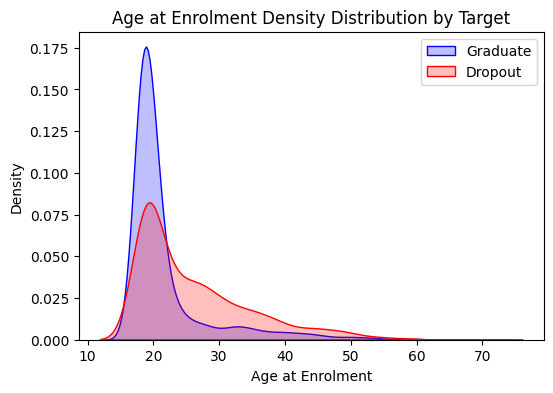

In [16]:
plt.figure(figsize=(6, 4))
p1 = sns.kdeplot(dataset[dataset['Target'] == 'Graduate']['Age at enrollment'], shade=True, color='b', label='Graduate')
p2 = sns.kdeplot(dataset[dataset['Target'] == 'Dropout']['Age at enrollment'], shade=True, color='r', label='Dropout')
plt.xlabel('Age at Enrolment')
plt.ylabel('Density')
plt.title('Age at Enrolment Density Distribution by Target')
plt.legend()
plt.show()


# *Displaced Students and Target*

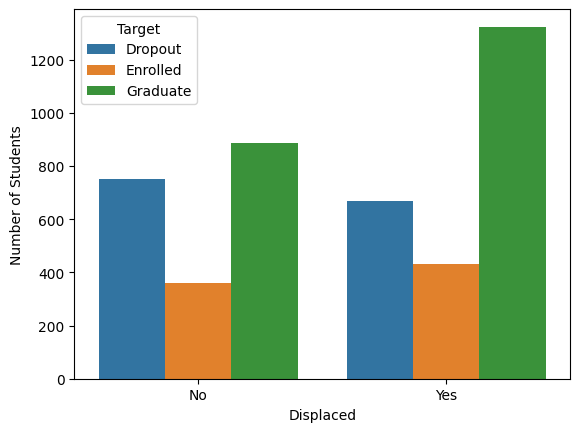

In [17]:
sns.countplot(data=dataset, x='Displaced', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

# *Day/Evening Attendance and Target*

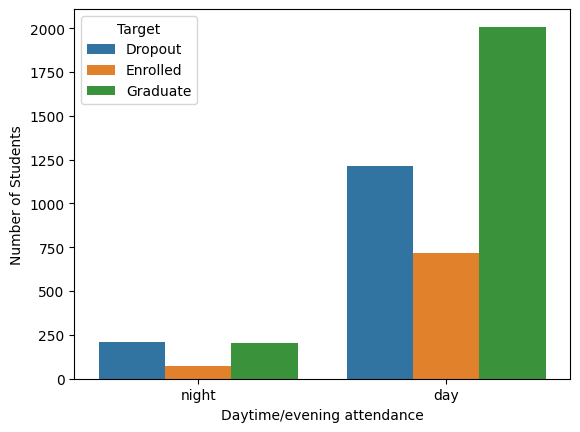

In [18]:
sns.countplot(data=dataset, x='Daytime/evening attendance', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[1,0],labels=['day','night'])
plt.xlabel('Daytime/evening attendance')
plt.ylabel('Number of Students')
plt.show()


# *Debtors and Target*

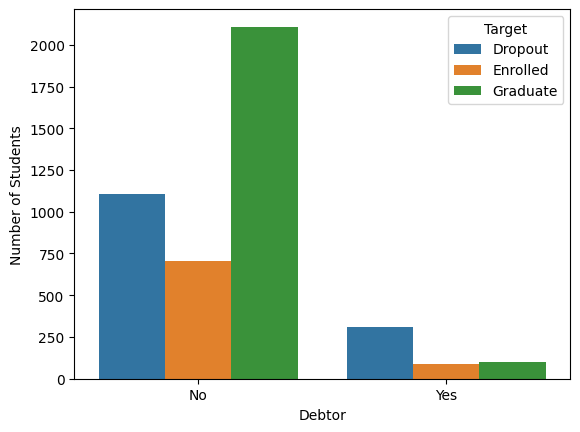

In [19]:
sns.countplot(data=dataset, x="Debtor", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Debtor')
plt.ylabel('Number of Students')
plt.show()

<ipython-input-24-3c456bc4ebdf>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p1 = sns.kdeplot(dataset[dataset['Target'] == 'Graduate']['Debtor'], shade=True, color='b', label='Graduate')
<ipython-input-24-3c456bc4ebdf>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p2 = sns.kdeplot(dataset[dataset['Target'] == 'Dropout']['Debtor'], shade=True, color='r', label='Dropout')


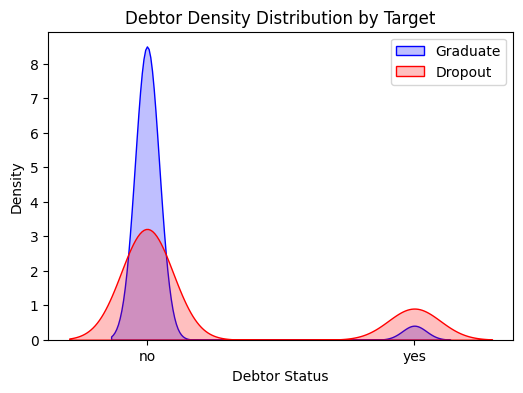

In [ ]:
plt.figure(figsize=(6, 4))
p1 = sns.kdeplot(dataset[dataset['Target'] == 'Graduate']['Debtor'], shade=True, color='b', label='Graduate')
p2 = sns.kdeplot(dataset[dataset['Target'] == 'Dropout']['Debtor'], shade=True, color='r', label='Dropout')
plt.xlabel('Debtor Status')
plt.ylabel('Density')
plt.xticks(ticks=[1,0],labels=['yes','no'])
plt.title('Debtor Density Distribution by Target')
plt.legend()
plt.show()


# *Scholarship holders and Target*

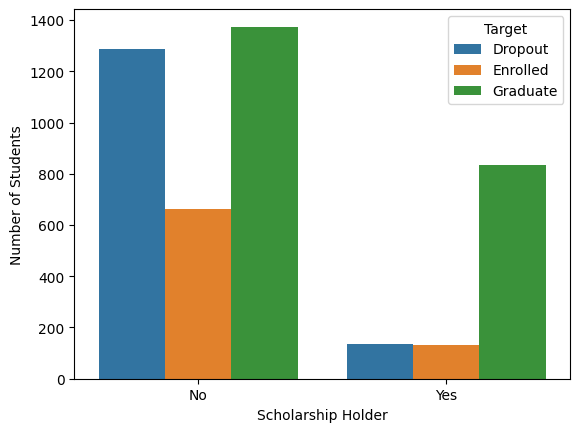

In [20]:
sns.countplot(data=dataset, x="Scholarship holder", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Scholarship Holder')
plt.ylabel('Number of Students')
plt.show()

<ipython-input-21-e245f6a23ed3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p1 = sns.kdeplot(dataset[dataset['Target'] == 'Graduate']['Scholarship holder'], shade=True, color='b', label='Graduate')
<ipython-input-21-e245f6a23ed3>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p2 = sns.kdeplot(dataset[dataset['Target'] == 'Dropout']['Scholarship holder'], shade=True, color='r', label='Dropout')


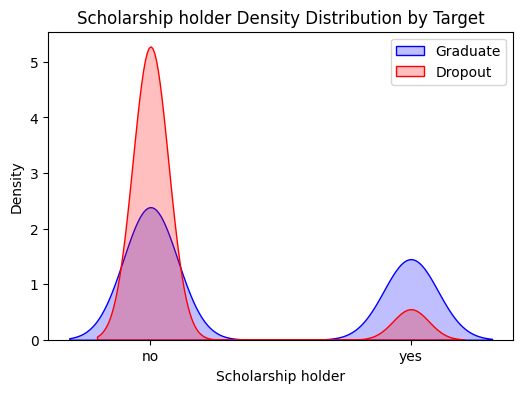

In [21]:
plt.figure(figsize=(6, 4))
p1 = sns.kdeplot(dataset[dataset['Target'] == 'Graduate']['Scholarship holder'], shade=True, color='b', label='Graduate')
p2 = sns.kdeplot(dataset[dataset['Target'] == 'Dropout']['Scholarship holder'], shade=True, color='r', label='Dropout')
plt.xlabel('Scholarship holder')
plt.ylabel('Density')
plt.xticks(ticks=[1,0],labels=['yes','no'])
plt.title('Scholarship holder Density Distribution by Target')
plt.legend()
plt.show()


# *Tuition Fees and Target*

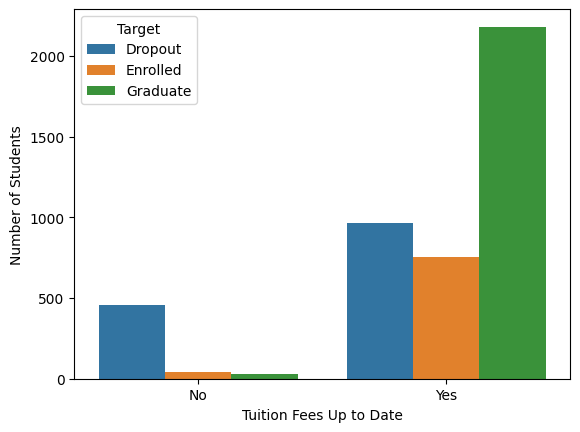

In [22]:
sns.countplot(data=dataset, x="Tuition fees up to date", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('Number of Students')
plt.show()

<ipython-input-23-53f41b184c04>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p1 = sns.kdeplot(dataset[dataset['Target'] == 'Graduate']['Tuition fees up to date'], shade=True, color='b', label='Graduate')
<ipython-input-23-53f41b184c04>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p2 = sns.kdeplot(dataset[dataset['Target'] == 'Dropout']['Tuition fees up to date'], shade=True, color='r', label='Dropout')


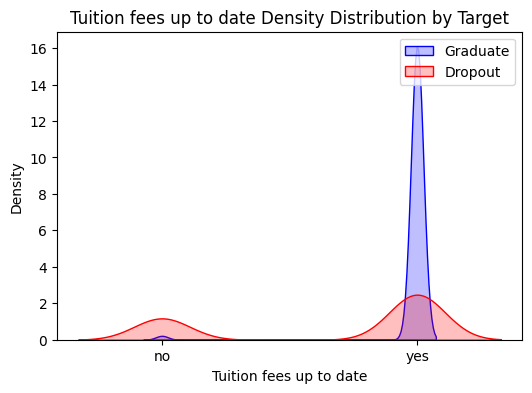

In [23]:
plt.figure(figsize=(6, 4))
p1 = sns.kdeplot(dataset[dataset['Target'] == 'Graduate']['Tuition fees up to date'], shade=True, color='b', label='Graduate')
p2 = sns.kdeplot(dataset[dataset['Target'] == 'Dropout']['Tuition fees up to date'], shade=True, color='r', label='Dropout')
plt.xlabel('Tuition fees up to date')
plt.ylabel('Density')
plt.xticks(ticks=[1,0],labels=['yes','no'])
plt.title('Tuition fees up to date Density Distribution by Target')
plt.legend()
plt.show()

# *Special needs Students and Target*

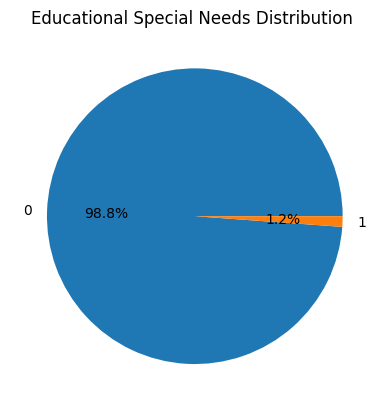

In [25]:
plt.pie(dataset['Educational special needs'].value_counts(), labels=dataset['Educational special needs'].value_counts().index, autopct='%2.1f%%')
plt.title('Educational Special Needs Distribution ')
plt.show()


In [26]:
special_needs=dataset[dataset['Educational special needs'] == 1]
normal_students=dataset[dataset['Educational special needs'] == 0]


In [27]:
counts=special_needs['Target'].value_counts()
counts

Graduate    23
Dropout     17
Enrolled    11
Name: Target, dtype: int64

In [28]:
normal_students_counts=normal_students['Target'].value_counts()
normal_students_counts

Graduate    2186
Dropout     1404
Enrolled     783
Name: Target, dtype: int64

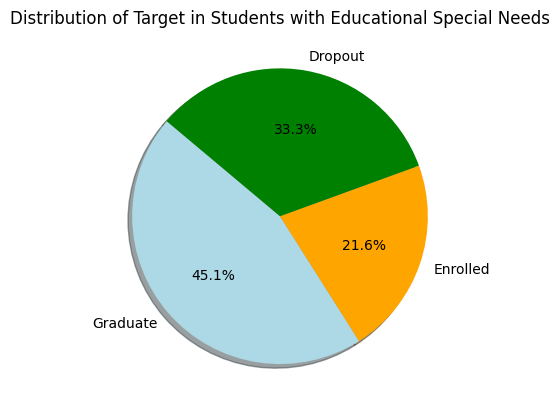

In [29]:
labels = special_needs['Target'].unique()
sizes = [special_needs[special_needs['Target'] == label]['Target'].count() for label in labels]

colors = ['lightblue', 'orange', 'green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Target in Students with Educational Special Needs')
plt.show()


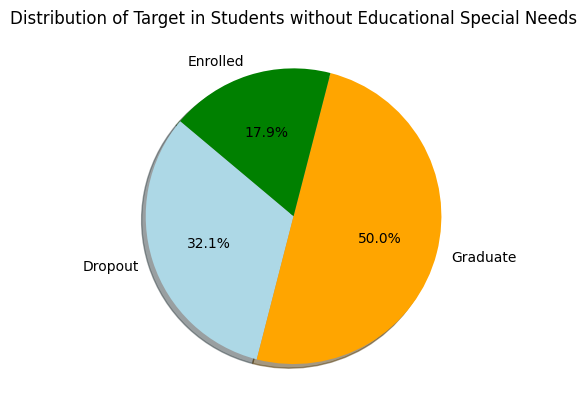

In [30]:
labels = normal_students['Target'].unique()
sizes = [normal_students[normal_students['Target'] == label]['Target'].count() for label in labels]

colors = ['lightblue', 'orange', 'green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Target in Students without Educational Special Needs')
plt.show()


# *Correlation with Heatmap*

In [31]:
from sklearn.preprocessing import LabelEncoder
dataset['encoded_target'] = LabelEncoder().fit_transform(dataset['Target'])

<ipython-input-32-4e2bbb77f6fb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

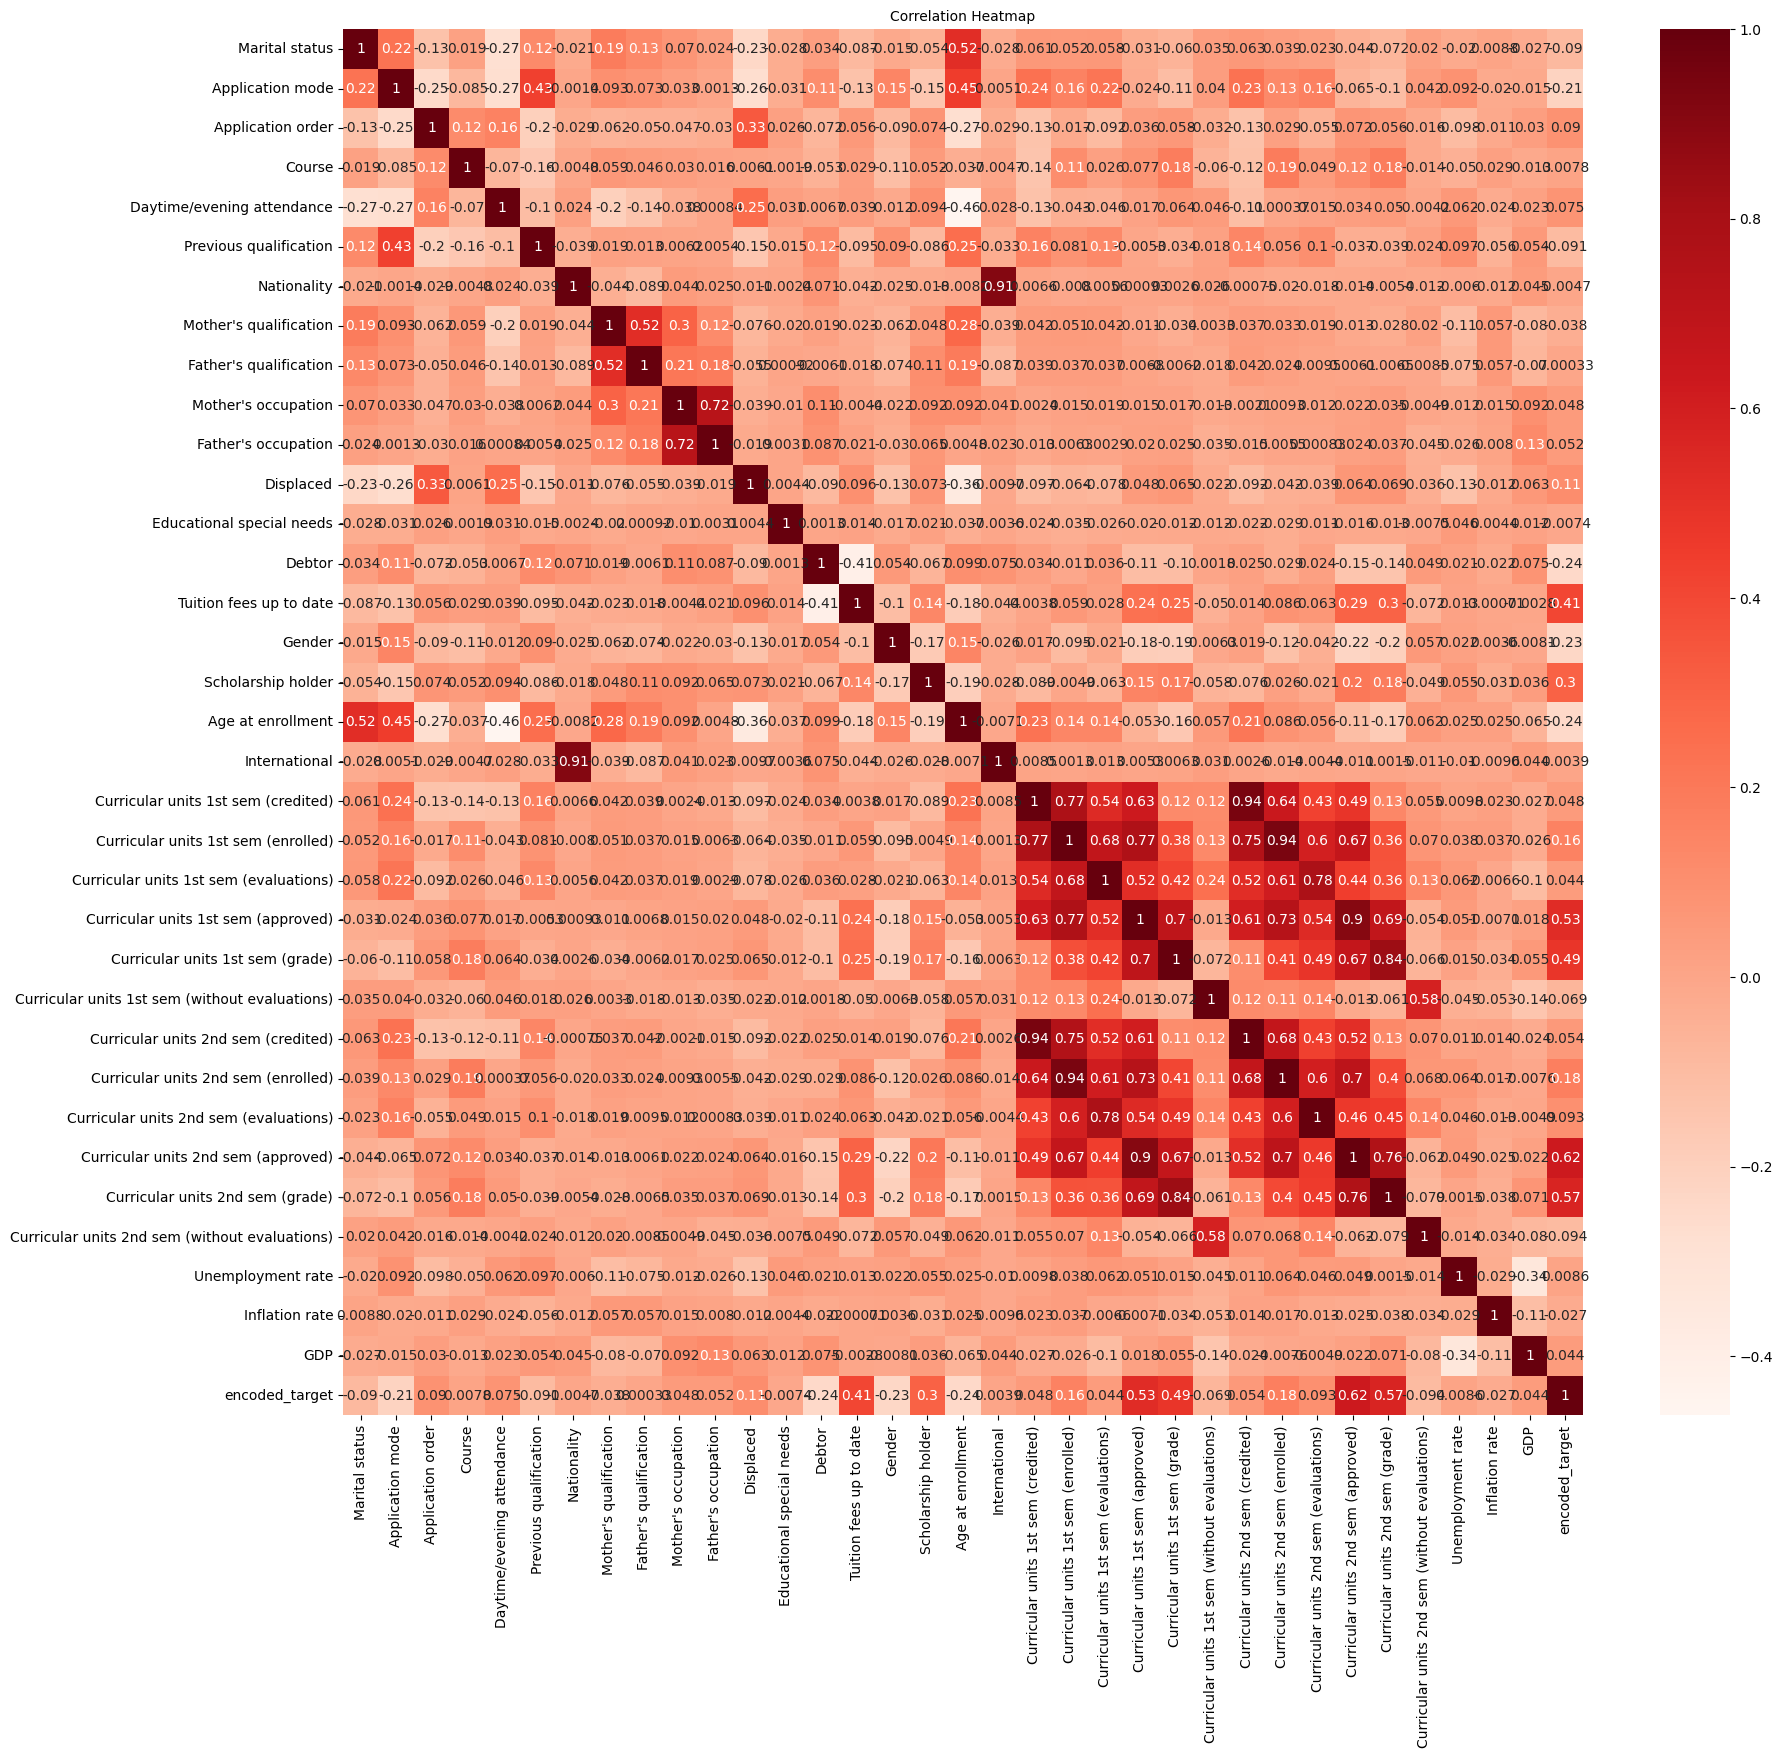

In [32]:
corr = dataset.corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=10)

# 5-Exploring Academic Data

In [33]:
academic_data = dataset[['Curricular units 1st sem (credited)',
                          'Curricular units 1st sem (enrolled)',
                          'Curricular units 1st sem (evaluations)',
                          'Curricular units 1st sem (approved)',
                          'Curricular units 1st sem (grade)',
                          'Curricular units 1st sem (without evaluations)',
                          'Curricular units 2nd sem (credited)',
                          'Curricular units 2nd sem (enrolled)',
                          'Curricular units 2nd sem (evaluations)',
                          'Curricular units 2nd sem (approved)',
                          'Curricular units 2nd sem (grade)',
                          'Curricular units 2nd sem (without evaluations)',
                          'encoded_target','Target']]

# *Heatmap correlation for Academic Data*

<ipython-input-34-b99a93cbacb8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(academic_data.corr(), annot=True, cmap='coolwarm', fmt=' .2f')


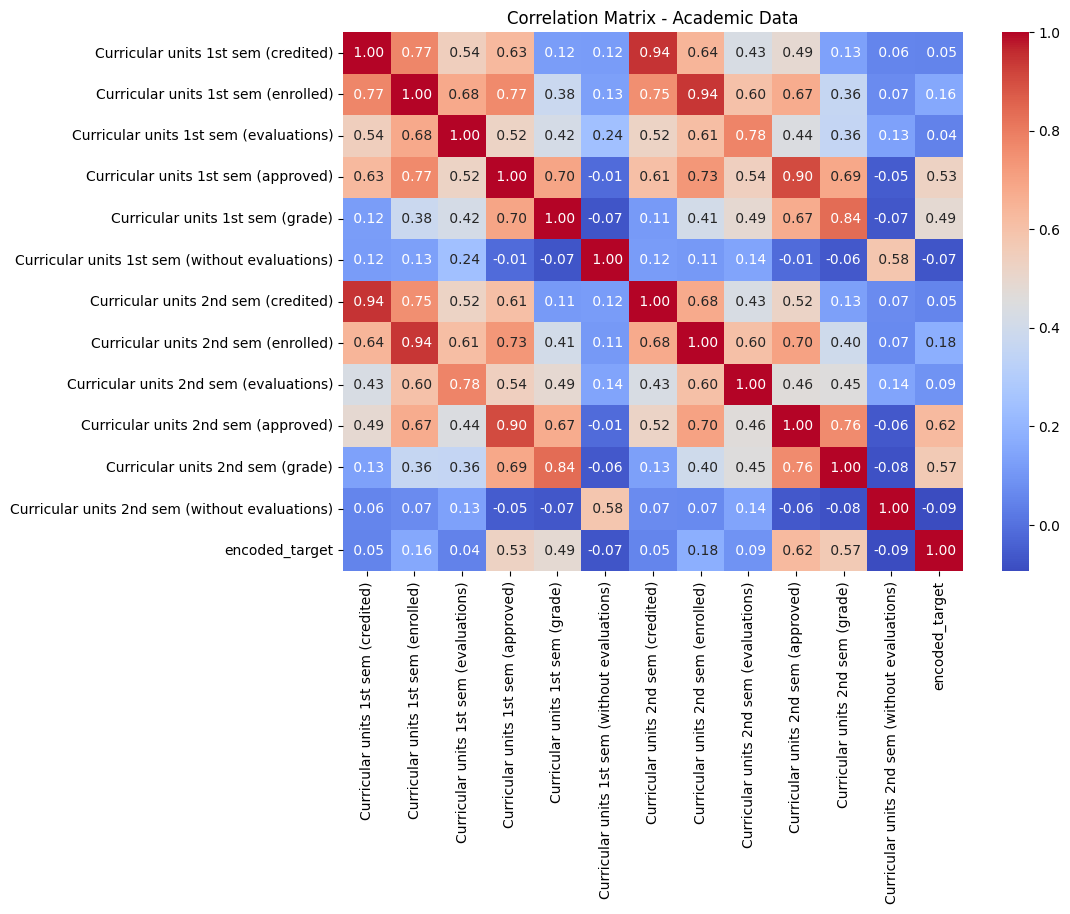

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(academic_data.corr(), annot=True, cmap='coolwarm', fmt=' .2f')
plt.title('Correlation Matrix - Academic Data')
plt.show()

# *Courses and Target*

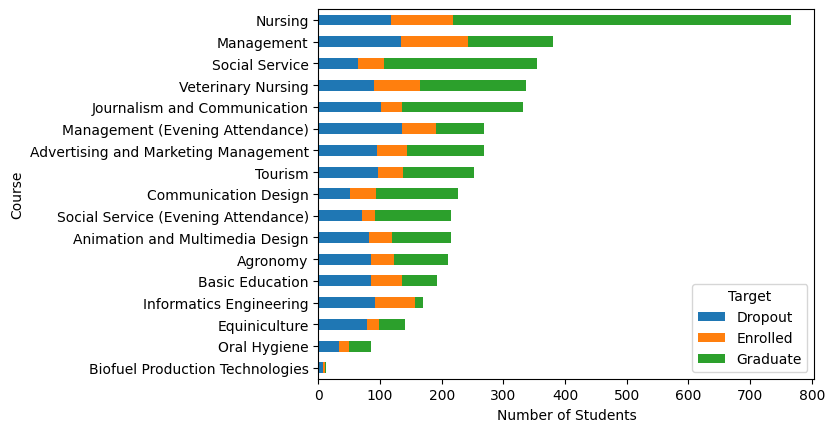

In [35]:
student_course = dataset.groupby(['Course', 'Target']).size().reset_index().pivot(columns='Target', index='Course', values=0)
student_course = student_course.rename(index={
    1:'Biofuel Production Technologies',
    2:'Animation and Multimedia Design',
    3:'Social Service (Evening Attendance)',
    4:'Agronomy',5:'Communication Design',
    6:'Veterinary Nursing',
    7:'Informatics Engineering',
    8:'Equiniculture',
    9:'Management',
    10:'Social Service',
    11:'Tourism',
    12:'Nursing',
    13:'Oral Hygiene',
    14:'Advertising and Marketing Management',
    15:'Journalism and Communication',
    16:'Basic Education',
    17:'Management (Evening Attendance)'})

student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course.loc[student_course_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.show()

In [36]:
removed_features=dataset[["Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)",
       "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)"]]


In [37]:
dataset.drop(columns=removed_features, inplace=True)
academic_data.drop(columns=removed_features, inplace=True)

# *Curricular units 2nd sem (approved) and Target*

<ipython-input-39-ce92fbc0ebd6>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p1 = sns.kdeplot(dataset[dataset['Target'] == 'Graduate']['Curricular units 2nd sem (approved)'], shade=True, color='b', label='Graduate')
<ipython-input-39-ce92fbc0ebd6>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p2 = sns.kdeplot(dataset[dataset['Target'] == 'Dropout']['Curricular units 2nd sem (approved)'], shade=True, color='r', label='Dropout')


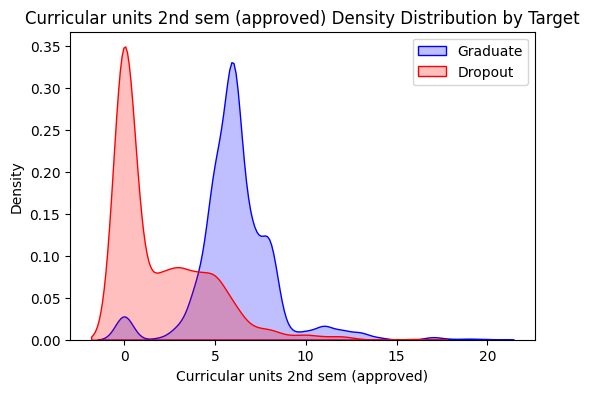

In [39]:
plt.figure(figsize=(6, 4))
p1 = sns.kdeplot(dataset[dataset['Target'] == 'Graduate']['Curricular units 2nd sem (approved)'], shade=True, color='b', label='Graduate')
p2 = sns.kdeplot(dataset[dataset['Target'] == 'Dropout']['Curricular units 2nd sem (approved)'], shade=True, color='r', label='Dropout')
plt.xlabel('Curricular units 2nd sem (approved)')
plt.ylabel('Density')
plt.title('Curricular units 2nd sem (approved) Density Distribution by Target')
plt.legend()
plt.show()


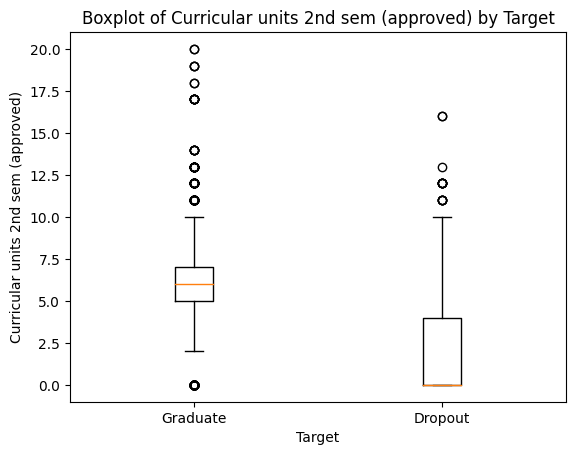

In [59]:
plt.boxplot([dataset[dataset['Target'] == 'Graduate']['Curricular units 2nd sem (approved)'], dataset[dataset['Target'] == 'Dropout']['Curricular units 2nd sem (approved)']], labels=['Graduate', 'Dropout'])
plt.xlabel('Target')
plt.ylabel('Curricular units 2nd sem (approved)')
plt.title('Boxplot of Curricular units 2nd sem (approved) by Target')
plt.show()


# *Curricular units 2nd sem (grade) and Target*

<ipython-input-40-d496509a8568>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p1 = sns.kdeplot(dataset[dataset['Target'] == 'Graduate']['Curricular units 2nd sem (grade)'], shade=True, color='b', label='Graduate')
<ipython-input-40-d496509a8568>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p2 = sns.kdeplot(dataset[dataset['Target'] == 'Dropout']['Curricular units 2nd sem (grade)'], shade=True, color='r', label='Dropout')


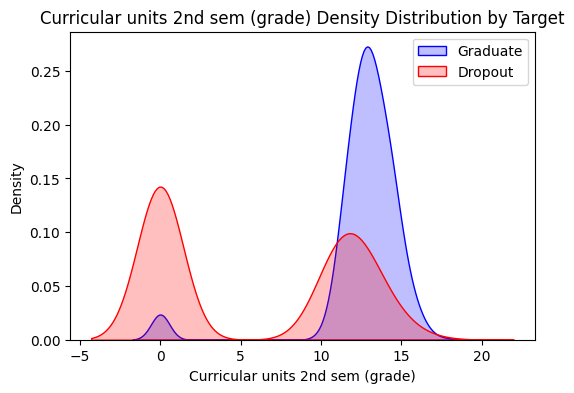

In [40]:
plt.figure(figsize=(6, 4))
p1 = sns.kdeplot(dataset[dataset['Target'] == 'Graduate']['Curricular units 2nd sem (grade)'], shade=True, color='b', label='Graduate')
p2 = sns.kdeplot(dataset[dataset['Target'] == 'Dropout']['Curricular units 2nd sem (grade)'], shade=True, color='r', label='Dropout')
plt.xlabel('Curricular units 2nd sem (grade)')
plt.ylabel('Density')
plt.title('Curricular units 2nd sem (grade) Density Distribution by Target')
plt.legend()
plt.show()


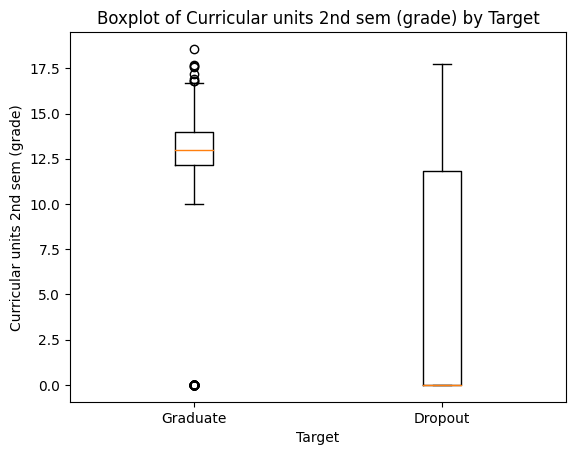

In [60]:
plt.boxplot([dataset[dataset['Target'] == 'Graduate']['Curricular units 2nd sem (grade)'], dataset[dataset['Target'] == 'Dropout']['Curricular units 2nd sem (grade)']], labels=['Graduate', 'Dropout'])
plt.xlabel('Target')
plt.ylabel('Curricular units 2nd sem (grade)')
plt.title('Boxplot of Curricular units 2nd sem (grade) by Target')
plt.show()


# 6-Data Preprocessing

In [41]:
dataset=dataset[dataset.Target!='Enrolled']


In [42]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1


    df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

    return df_no_outliers

remove_outliers(dataset)
dataset.shape

<ipython-input-42-2df2628bb446>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-42-2df2628bb446>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-42-2df2628bb446>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


(3630, 31)

In [43]:
X = dataset.drop(['Target','encoded_target'], axis=1)
y = dataset['encoded_target']

In [44]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 7-Modelling

#*Splitting the Data*

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 2)

# *Logistic Regression*

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [47]:
pred_lr = logreg.predict(X_test)
LogScore=accuracy_score(y_test,pred_lr)
LogScore

0.9104683195592287

# *Random Forest Classifier*

In [48]:
random_forest=RandomForestClassifier()
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
pred_rf=random_forest.predict(X_test)
RFscore=accuracy_score(y_test,pred_rf)
RFscore

0.8884297520661157

# *Decision Tree Classifier*

In [50]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
dt_pred=dt.predict(X_test)
DTscore=accuracy_score(y_test,dt_pred)
DTscore

0.8553719008264463

# *KNeighbors Classifier*

In [52]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
KNN_pred=knn.predict(X_test)
KNNscore=accuracy_score(y_test,KNN_pred)
KNNscore

0.8553719008264463